In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


In [4]:
df = pd.read_csv("./ABCD.csv")

In [18]:
df["paper"] = pd.Categorical(df["Paper"])

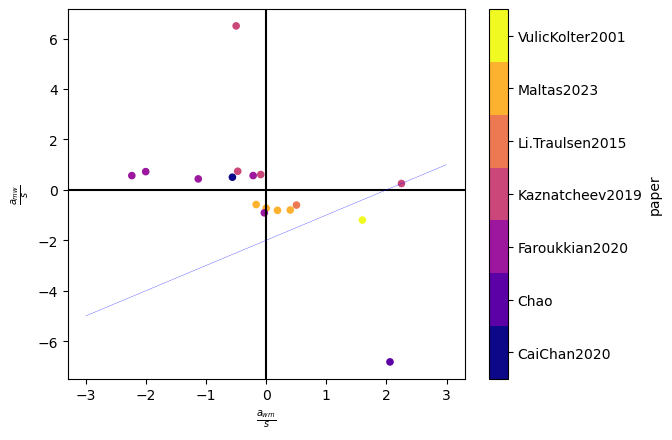

In [60]:
x = np.linspace(-3, 3, 50)
y = x -2
y2 = x/(1+x)

df.plot.scatter(x="awm_s", y="amw_s", c="paper", cmap="plasma"); plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.plot(x, y, 'b', lw=0.2, label ='Masking')
#plt.plot(y2,x, 'r', lw=0.2, label ='Mimicry')
plt.xlabel(r"$\frac{a_{wm}}{s}$")
plt.ylabel(r"$\frac{a_{mw}}{s}$")
plt.savefig("Experimental.png")

In [48]:
x = np.linspace(-4, 7, 50)


df.plot.scatter(x="awm_s", y="amw_s", c="paper", cmap="plasma"); plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.plot(x, y, 'b', lw=0.2, label ='Masking')
#plt.plot(y2,x, 'r', lw=0.2, label ='Mimicry')
plt.xlabel(r"$\frac{a_{wm}}{s}$")
plt.ylabel(r"$\frac{a_{mw}}{s}$")
plt.savefig("Experimental.png")

<Figure size 640x480 with 0 Axes>